# Discrete Optimization

In this tutorial we will go into some of the details of optimizing a Euclidean landscape in discrete space.

In [7]:
# Fix PROJ path ---------------------------------------------------------------
import os; 
os.environ['PROJ_LIB']=r'/opt/conda/pkgs/proj-9.2.1-ha5fc9e9_0/share/proj'
# Load libraries --------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import MGSurvE as srv
%matplotlib inline
# Setup data path and ID ------------------------------------------------------
(ID, OUT_PTH) = ('DiscreteGA', './out/')
srv.makeFolder(OUT_PTH)

In [8]:
PTS_NUM = 10
RADII = (-100, 100)
# Generate pointset -----------------------------------------------------------
xy = srv.ptsRegularGrid(PTS_NUM, (RADII, RADII)).T
# Re-shape pointset into dataframe --------------------------------------------
points = pd.DataFrame({
    'x': xy[0], 'y': xy[1], 
    't': [0]*len(xy[0])
})

In [9]:
nullTraps = [0, 0, 0, 0]
traps = pd.DataFrame({
    'x': nullTraps, 'y': nullTraps,
    'sid': nullTraps,
    't': [0, 0, 1, 1], 'f': nullTraps
})
tKer = {
    0: {'kernel': srv.exponentialDecay, 'params': {'A': .5, 'b': .1}},
    1: {'kernel': srv.exponentialDecay, 'params': {'A': .5, 'b': .125}}
}

In [10]:
lnd = srv.Landscape(
    points, 
    kernelParams={'params': srv.MEDIUM_MOV_EXP_PARAMS, 'zeroInflation': .25}, 
    traps=traps, trapsKernels=tKer
)

In [11]:
(lnd, logbook) = srv.optimizeDiscreteTrapsGA(
    lnd, generations=500, 
    pop_size='auto', mating_params='auto', 
    mutation_params='auto', selection_params='auto',
)
dta = pd.DataFrame(logbook)

/Users/sanchez.hmsc/miniconda3/envs/MGSurvE/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/sanchez.hmsc/miniconda3/envs/MGSurvE/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min    	avg    	max    	std     	best	traps           
0  	50    	2.15067	2.31504	2.90664	0.135517	16  	[38, 71, 74, 43]
1  	33    	2.11837	2.26055	2.54783	0.0826168	21  	[38, 24, 74, 51]
2  	28    	2.11837	2.231  	2.52943	0.0884013	8   	[38, 24, 74, 51]
3  	26    	2.11837	2.19851	2.78364	0.103698 	4   	[38, 24, 74, 51]
4  	34    	2.11746	2.2014 	2.52163	0.0902645	39  	[25, 64, 57, 61]
5  	24    	2.11746	2.17871	2.41374	0.0739555	1   	[25, 64, 57, 61]
6  	28    	2.10557	2.17857	2.39237	0.0758322	44  	[38, 24, 78, 72]
7  	26    	2.10557	2.15761	2.33563	0.0560687	22  	[38, 24, 78, 72]
8  	17    	2.10557	2.15219	2.33427	0.05585  	12  	[38, 24, 78, 72]
9  	33    	2.10557	2.18117	2.48664	0.0995855	1   	[38, 24, 78, 72]
10 	28    	2.10557	2.18037	2.45411	0.0995452	1   	[38, 24, 78, 72]
11 	30    	2.10211	2.15438	2.36078	0.0720054	10  	[46, 24, 78, 72]
12 	28    	2.10211	2.14542	2.37194	0.0613881	10  	[46, 24, 78, 72]
13 	36    	2.10211	2.16999	2.52712	0.0977715	5   	[46, 24, 78, 7

(<Figure size 1500x1500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2855ba110>)

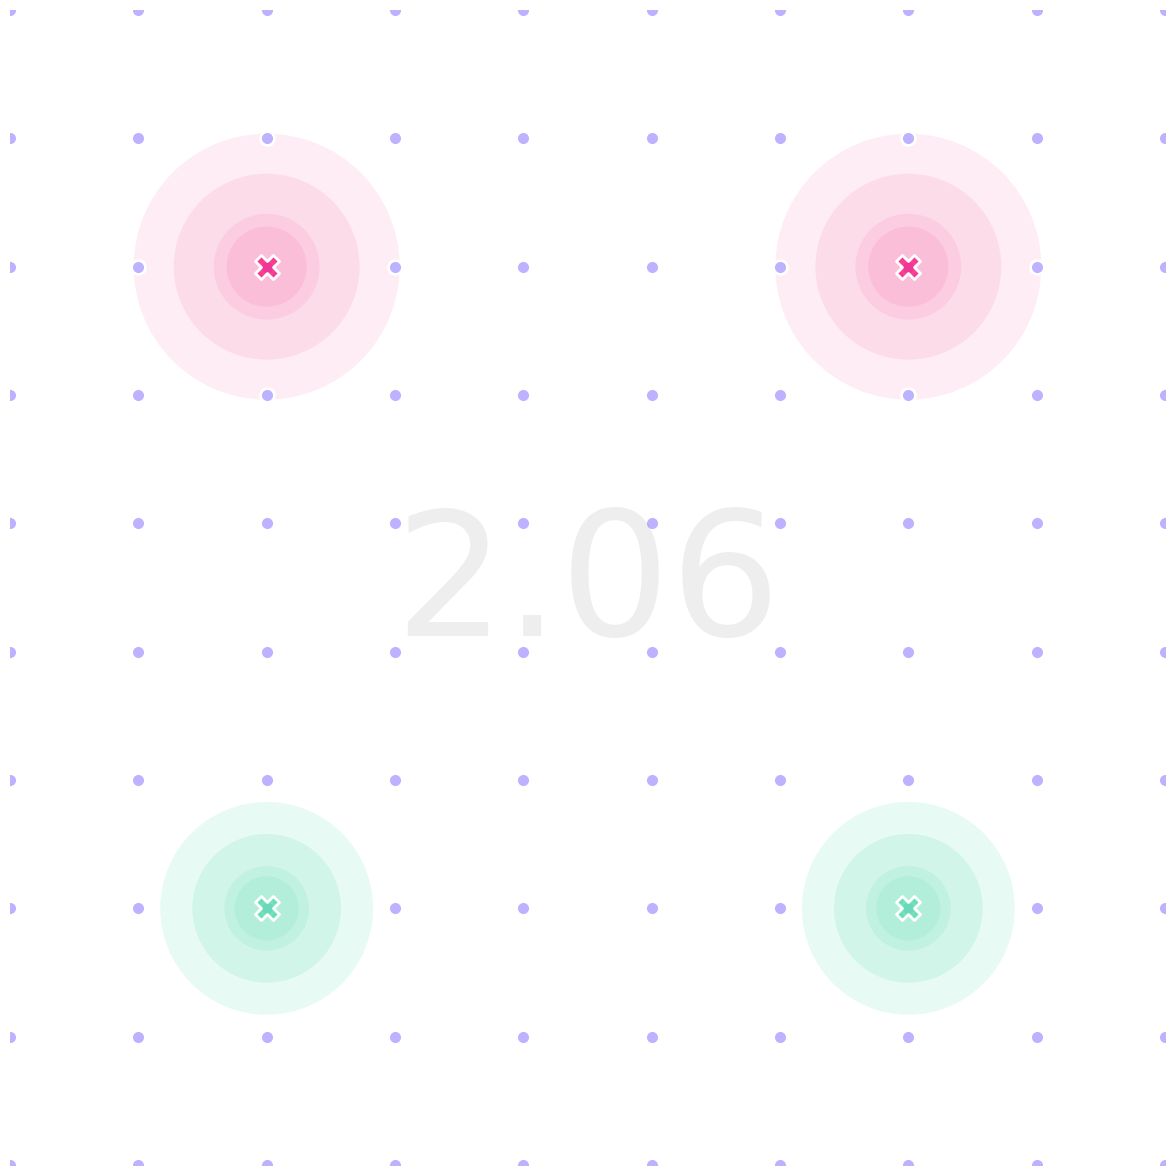

In [13]:
(fig, ax) = plt.subplots(1, 1, figsize=(15, 15), sharey=False)
lnd.plotSites(fig, ax, size=100)
lnd.plotTraps(fig, ax)
srv.plotClean(fig, ax, bbox=lnd.landLimits)
srv.plotFitness(fig, ax, min(dta['min']))

<hr>

# More Information

* [MGSurvE's Extensive Discrete Tutorial](https://chipdelmal.github.io/MGSurvE/build/html/GA_discrete.html)
* [DEAP's documentation](https://deap.readthedocs.io/en/master/)